
<h2> Dataset: </h2>

"Fraud_Data" - information about each user first transaction <br>

<h2> Columns: </h2>

1. user_id: Unique user ID
2. signup_time: The time when the user created their account (GMT time)
3. purchase_time: The time when the user bought the item (GMT time)
4. purchase_value: The cost of the item purchased (USD)
5. device_id: The device id. You can assume that it is unique by device. (If two transactions have the same device ID that means that the same physical device was used to purchase)
6. source: User marketing channel: ads, SEO, direct 
7. browser: The browser used by the user.
8. sex: User sex: Male/Female
9. age: user age
10. ip_address: user numeric IP address
11. class: This is the target variable. Fraudulent activities is tagged as ‘1’, whereas non-fraudulent activities are tagged as ‘0’


In [17]:
#Notebook preferences
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML

import pandas as pd
import numpy as np
import sklearn
import os
import itertools


import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans"]
rcParams["text.usetex"] = False
rcParams["text.latex.preamble"] = r"\usepackage{cmbright}"
rcParams['xtick.major.pad']='10'
rcParams['ytick.major.pad']='10'
rcParams['font.size'] = 22
rcParams['axes.labelsize'] = 22
rcParams['axes.labelweight'] = 'bold'
rcParams['axes.titlesize'] = 20
rcParams['xtick.labelsize'] = 17
rcParams['ytick.labelsize'] = 17
rcParams['legend.fontsize'] = 15
rcParams['figure.titlesize'] = 20

In [3]:
df = pd.read_csv("../../fraud/Fraud_Data.csv")
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [71]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Some handy scripts:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.copper):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=20)
    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)
    plt.tight_layout()
   

    return plt

<h2>Baseline model </h2>

In [72]:
def baseline_model(df):
    no_fraud = np.zeros(len(df))
    return no_fraud

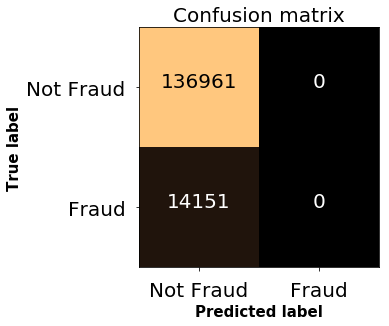

[[136961      0]
 [ 14151      0]]


In [76]:
y_pred = baseline_model(df)
cm = confusion_matrix(df['class'], y_pred)
fig = plt.figure(figsize=(7, 5))
plot = plot_confusion_matrix(cm, classes=['Not Fraud', 'Fraud'], normalize=False, title='Confusion matrix')
plt.savefig('baseline_cm.png')
plt.show()
print(cm)

No handles with labels found to put in legend.


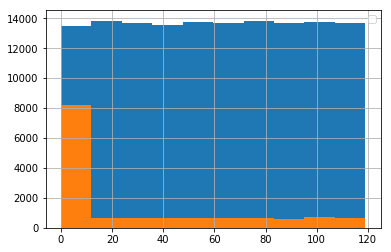

In [48]:
fig, ax = plt.subplots()
df.groupby('class')['lagdays'].hist(ax=ax)
ax.legend();

No handles with labels found to put in legend.


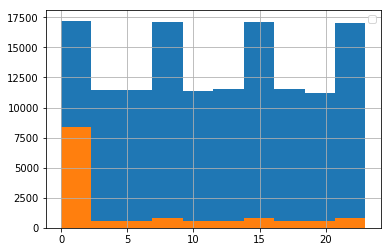

In [52]:
fig, ax = plt.subplots()
df.groupby('class')['laghrz'].hist(ax=ax)
ax.legend();

No handles with labels found to put in legend.


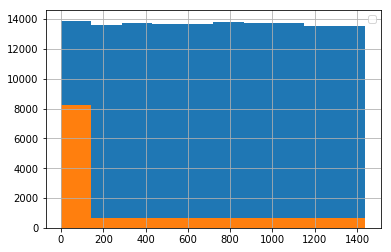

In [54]:
fig, ax = plt.subplots()
df.groupby('class')['lagminz'].hist(ax=ax)
ax.legend();

No handles with labels found to put in legend.


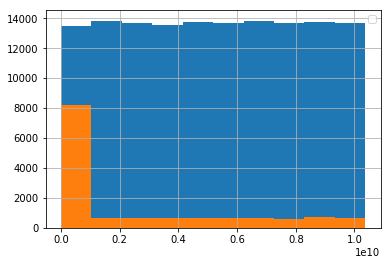

In [99]:
fig, ax = plt.subplots()
df.groupby('class')['lagmilli'].hist(ax=ax)
ax.legend();

No handles with labels found to put in legend.


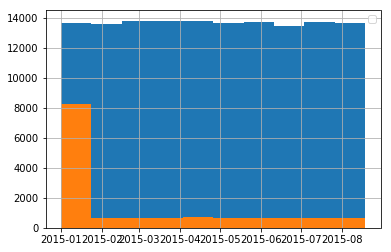

In [127]:
fig, ax = plt.subplots()
df.groupby('class')['signup_time'].hist(ax=ax)
ax.legend();

No handles with labels found to put in legend.


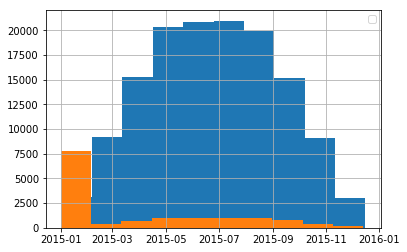

In [128]:
fig, ax = plt.subplots()
df.groupby('class')['purchase_time'].hist(ax=ax)
ax.legend();

No handles with labels found to put in legend.


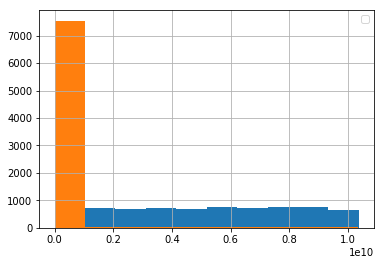

In [183]:
fig, ax = plt.subplots()
df[(df['signup_time']<'2015-01-13')&(df['lagdays'] <= 200)].groupby('class')['lagmilli'].hist(ax=ax, bins = 10)
ax.legend();

In [95]:
df.groupby('class')[['user_id']].count()

,user_id
class,
0,136961
1,14151


In [111]:
df.query('lagmilli == 1000').groupby('class')['user_id'].count()

class
1    7600
Name: user_id, dtype: int64

In [117]:
print('{:.64f}'.format(df['lagmilli'].iloc[25]))

960070000.0000000000000000000000000000000000000000000000000000000000000000


No handles with labels found to put in legend.


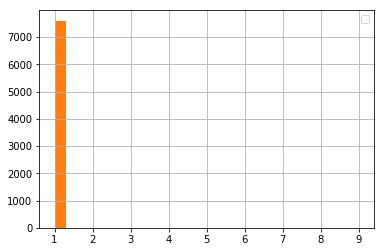

In [83]:
fig, ax = plt.subplots()
df[df['lagsecs']<10].groupby('class')['lagsecs'].hist(ax=ax)
ax.legend();

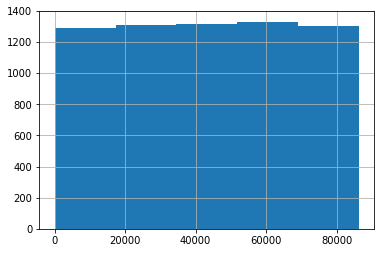

In [71]:
df['lagsecs'][df['class']==1][df['lagsecs']>1].hist(bins = 5)

No handles with labels found to put in legend.


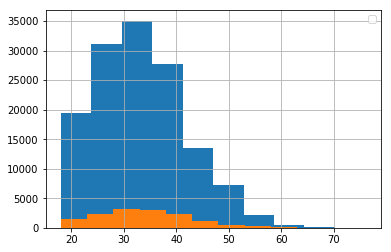

In [28]:
fig, ax = plt.subplots()
df.groupby('class')['age'].hist(ax=ax)
ax.legend();

In [ ]:
fig, ax = plt.subplots(figsize = (15,5))
#cmap_mine = matplotlib.colors.ListedColormap(['white', 'red'])
cax = calmap.yearplot(ts_purchase['purchase_value'],how=u'mean',
                      cmap = "PuBu")
cbar = fig.colorbar(cax.get_children()[1], ax=cax, orientation='horizontal', aspect=150)
plt.title('Average values of the purchases per day')

In [ ]:
from matplotlib.colors import ListedColormap
fig, ax = plt.subplots(figsize = (15,5))
cax = calmap.yearplot(ts_purchase['age'],how=u'mean',
                      cmap=ListedColormap(sns.color_palette("RdYlBu",1000)))
cbar = fig.colorbar(cax.get_children()[1], ax=cax, orientation='horizontal', aspect=150)
plt.title('Average age of Purchasers each day')

In [8]:
df0 = df[df["class"]==0]
df1 = df[df["class"]==1]

In [12]:
a = pd.read_csv("../../fraud/IpAddress_to_Country.csv")
a.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [ ]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize = (25,5))

sns.countplot(x = 'sex',hue = 'class', data = df, ax = ax1);
sns.countplot(x = 'browser',hue = 'class', data = df, ax =ax2);
sns.countplot(x = 'source',hue = 'class', data = df, ax = ax3);
ax2.set_ylabel('')    
ax3.set_ylabel('')
plt.show()